In [365]:
import numpy as np
import pyvista as pv

In [366]:
nxy = 5
dims = np.array([nxy, nxy, 1])
dims_plus1 = [dims[0] + 1, dims[1] + 1, dims[2]]
grid = pv.UniformGrid(
    dims=dims_plus1,
    spacing=(1, 1, 1),
    origin=(0, 0, 0),
)
points_t = np.transpose(grid.points.T)

In [367]:
points_t

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.]])

In [368]:
non_boundary_n = (dims_plus1[0] - 2) * (dims_plus1[1] - 2)
non_boundary_n

16

In [369]:
n_item = non_boundary_n * 50 // 100
n_item

8

In [370]:
obj = np.concatenate([np.ones([n_item]), np.zeros([non_boundary_n - n_item])])
np.random.shuffle(obj)
obj = obj.reshape((dims_plus1[0] - 2, dims_plus1[1] - 2))
obj = np.pad(obj, 1)
obj = obj.reshape(dims_plus1[0] * dims_plus1[1])
obj = np.array(obj, dtype=np.int)
points_v = []
for i, o in enumerate(obj):
    if o == 1:
        points_v.append(points_t[i])
points_v = np.array(points_v)
points_v

array([[1., 1., 0.],
       [2., 1., 0.],
       [4., 1., 0.],
       [2., 2., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 4., 0.],
       [4., 4., 0.]])

/Users/engineering/Documents/anaconda3/envs/shapely-pyvista/lib/python3.6/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


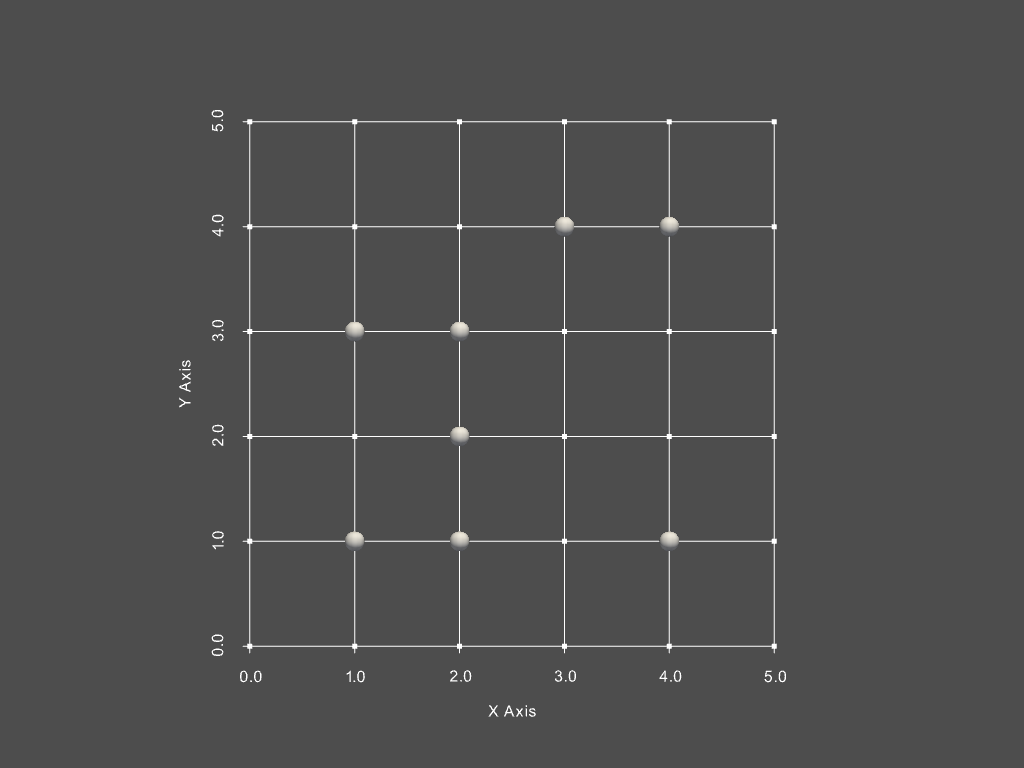

In [371]:
plot = pv.Plotter()
plot.add_points(points_t)
plot.add_points(points_v, render_points_as_spheres=True, point_size=20.0)
plot.show_bounds()
plot.show_grid()
plot.camera_position = 'xy'
plot.show()